# 机器学习与人工智能 (Machine Learning and Artificial Intelligence) 
# 2024 Fall
# Assignment 1


### <font color='red'>Due Date: October 18, 2024 11:59pm</font> 

Deliverables:

- Write down your codes in the given cells described in this file, denoted as "**YOUR CODE HERE**"
- Use "download as" in the "file" menu to convert your ipython file to a .html file
- **Zip** two files: .ipynb, and .html files, and submit your zip to the Blackboard


### <font color='green'>This assignment covers Supervised Learning models.</font>  

### <font color='red'>Please proceed with caution and ensure no question is missed.</font>  

In [21]:
NAME = "王靖杰"
StudentID = "2100093008"

## Part I. Generate and play with your simulated data and, have fun! (45 Points)

You will conduct a simulation study to examine the bias-variance trade-off in greater detail. This exercise compares prediction performance between linear regression and k-NN. Through this analysis, you will learn to identify the conditions under which each method excels in minimizing test error.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Q1.1: Data Generation (5 Points)

You will start by exploring a scenario where the true relationship between `x` and `y` is linear. 
You will generate data from the linear model:

$$ y = f(x) + \epsilon $$

where $ f(x) = 1.8x + 2 $

To create a synthetic **training** set, let's make 100 independent draws of `x` from a uniform distribution on $[-1, 1]$ to form $ \{x_1, x_2, \dots, x_{100}\} $. Similarly, draw random noise $\epsilon$ from a Normal distribution with mean zero and standard deviation 0.1 to have $ \{\epsilon_1, \dots, \epsilon_{100}\} $. For each $i \in \{1, \dots, 100\}$, generate $y_i$ from the linear model where:

   $$
   y_i = 1.8x_i + 2 + \epsilon_i
   $$

Now, repeat the above process and generate an additional 10,000 observations that will form the **test** set. Note that we are constructing a large test set in order to have an accurate out-of-sample MSE estimate. You will use this simulated dataset to try out and compare different models.


In [23]:
# YOUR CODE HERE
# Generate train pair
X_train = np.random.uniform(-1,1,100)
train_noise = np.random.normal(0,0.1,100)
y_train = 1.8 * X_train + 2 + train_noise

# Generate test pair
X_test = np.random.uniform(-1,1,10000)
test_noise = np.random.normal(0,0.1,10000)
y_test = 1.8 * X_test + 2 + test_noise

### Q1.2: Scatter Plot (4 Points)

Create a scatter plot of `y` vs `x`. In the same figure, draw the true relationship in black solid line.

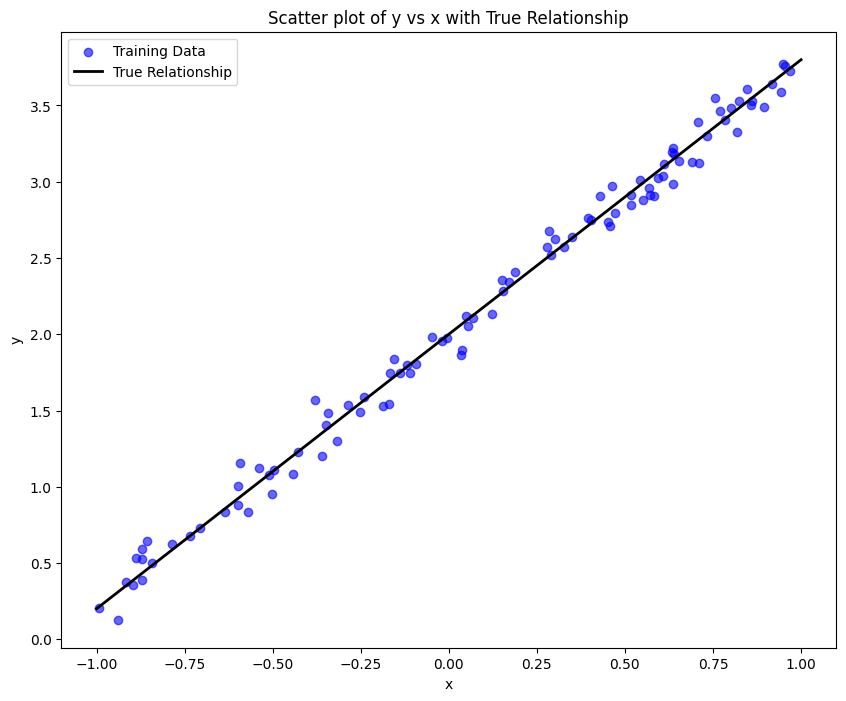

In [24]:
# YOUR CODE HERE
# Plot scatterplot
plt.figure(figsize=(10, 8)) 
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)

# True relationship line
x_line = np.linspace(-1, 1, 100)
y_line = 1.8 * x_line + 2
plt.plot(x_line, y_line, color='black', linestyle= 'solid', label='True Relationship', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y vs x with True Relationship')

plt.legend()
plt.show()

### Q1.3: Linear Regression Model (4 Points)

Train a linear regression model with the training data you simulated. On the same plot from the previous question, draw a blue dashed line representing your predicted line.


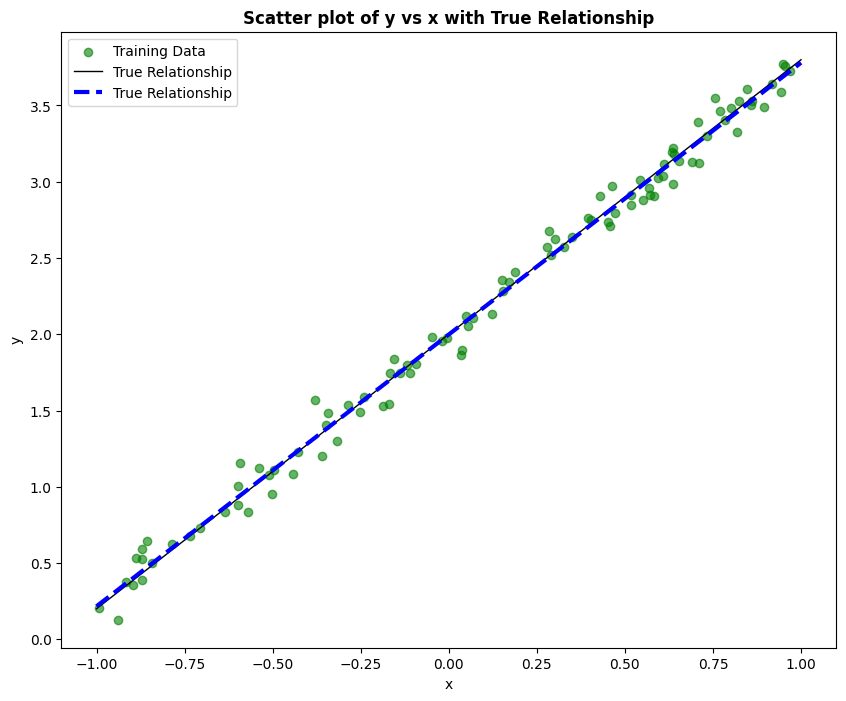

Mean Squared Error (MSE): 0.0104
lr.coef_: [1.78201125]
lr.intercept_: 1.9983418438902891
Training set score: 0.99
Test set score: 0.99


In [25]:
# YOUR CODE HERE
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train)

# Get the predicted values for the line
y_pred_test = lr.predict(X_test.reshape(-1, 1))


#plot the graph
plt.figure(figsize=(10, 8)) 
plt.scatter(X_train, y_train, color='green', label='Training Data', alpha=0.6)
x_line = np.linspace(-1, 1, 100)
y_line = 1.8 * x_line + 2
plt.plot(x_line, y_line, color='black', linestyle= 'solid', label='True Relationship', linewidth=1)

# Get the predicted values for the line
y_pred = lr.predict(x_line.reshape(-1, 1))
# plot the predicted line
plt.plot(x_line, y_pred, color='blue', linestyle= 'dashed', label='True Relationship', linewidth=3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y vs x with True Relationship', weight='bold')

plt.legend()
plt.show()


mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1))))
print("Test set score: {:.2f}".format(lr.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))))


### Q1.4: k-NN Model (8 Points)

You may find that the linear regression line provides a very good estimate of $f(x)$. Now, use k-NN to find the relationship between $y$ and $x$. On one plot, redraw the scatter plot and the true relationship, but this time overlay it with predicted fit using k-NN with $k = 2$. 

On a juxtaposed graph, do the same for $k = 12$.



Training set score: 1.00
Test set score: 0.99


Training set score: 1.00
Test set score: 0.99


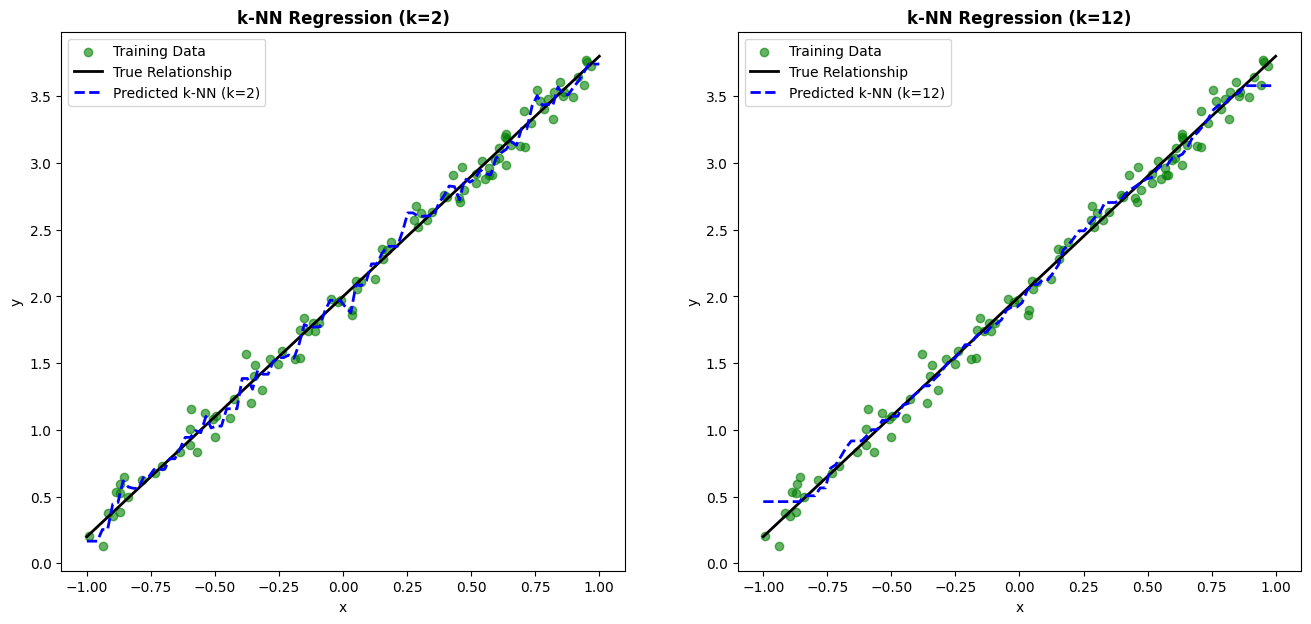

In [26]:
# YOUR CODE HERE
knn_2 = KNeighborsRegressor(n_neighbors=2)
knn_2.fit(X_train.reshape(-1, 1),y_train)

print("Training set score: {:.2f}".format(knn_2.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1))))
print("Test set score: {:.2f}".format(knn_2.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))))

print("\n")

knn_12 = KNeighborsRegressor(n_neighbors=12)
knn_12.fit(X_train.reshape(-1, 1),y_train)

print("Training set score: {:.2f}".format(knn_2.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1))))
print("Test set score: {:.2f}".format(knn_2.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))))


# Predict y values for the test data using k-NN models
y_knn_2 = knn_2.predict(x_line.reshape(-1, 1))
y_knn_12 = knn_12.predict(x_line.reshape(-1, 1))

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot for k = 2
ax[0].scatter(X_train, y_train, color='green', label='Training Data', alpha=0.6)
ax[0].plot(x_line, y_line, color='black', linestyle='solid', label='True Relationship', linewidth=2)
ax[0].plot(x_line, y_knn_2, color='blue', linestyle='dashed', label='Predicted k-NN (k=2)', linewidth=2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('k-NN Regression (k=2)', weight='bold')
ax[0].legend()

# Plot for k = 12
ax[1].scatter(X_train, y_train, color='green', label='Training Data', alpha=0.6)
ax[1].plot(x_line, y_line, color='black', linestyle='solid', label='True Relationship', linewidth=2)
ax[1].plot(x_line, y_knn_12, color='blue', linestyle='dashed', label='Predicted k-NN (k=12)', linewidth=2)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('k-NN Regression (k=12)', weight='bold')
ax[1].legend()

plt.show()


### Q1.5: MSE (8 Points)

Plot the test set mean squared error using k-NN against $ \log(1/k) $ for $k = 2, 3, \dots, 15$. On the same graph, include a horizontal dashed line representing the test set MSE from linear regression. 

Analyze which model performs best and discuss how the relative performance of linear regression compares to k-NN with different values of $k$.

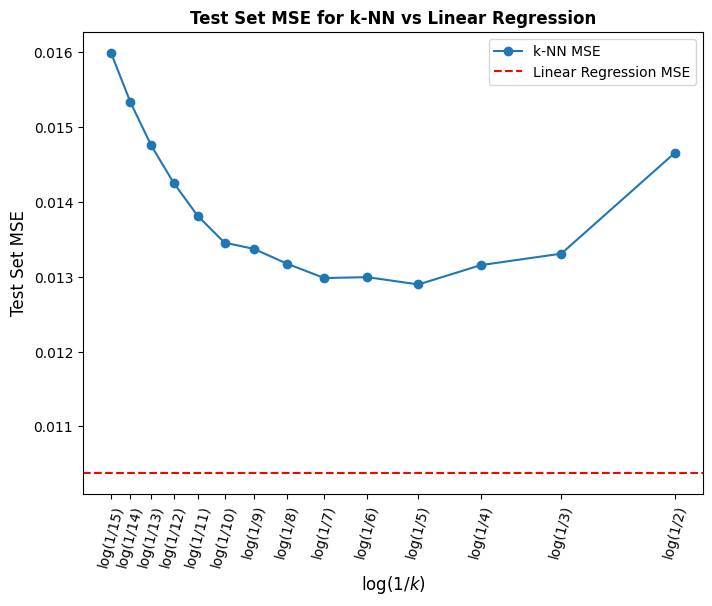

In [27]:
# YOUR CODE HERE
knn_mse = []
k_values = np.arange(2, 16)

# Calculate the MSE for each k in k_values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train.reshape(-1, 1), y_train)
    y_pred_knn = knn.predict(X_test.reshape(-1, 1))
    mse = mean_squared_error(y_test, y_pred_knn)
    knn_mse.append(mse)

# Train linear regression and compute test set MSE
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train)
y_pred_linear = lr.predict(X_test.reshape(-1, 1))
linear_mse = mean_squared_error(y_test, y_pred_linear)

# Plot MSE against log(1/k) positions
plt.figure(figsize=(8, 6))

# Plot the data at actual log(1/k) positions
log_1_over_k = np.log(1 / np.array(k_values))
plt.plot(log_1_over_k, knn_mse, marker='o', label='k-NN MSE')

# Add horizontal line for linear regression MSE
plt.axhline(y=linear_mse, color='r', linestyle='--', label='Linear Regression MSE')

# Use the actual log(1/k) values for both the data and ticks
xticks_values = np.log(1 / np.array(k_values))
xticks_labels = [f'log(1/{k})' for k in k_values]

# Apply the correct ticks to match the data points
plt.xticks(ticks=xticks_values, labels=xticks_labels, rotation=75)

# Labels and title
plt.xlabel('$\log(1/k)$', fontsize=12)
plt.ylabel('Test Set MSE', fontsize=12)
plt.title('Test Set MSE for k-NN vs Linear Regression', weight='bold')
plt.legend()

plt.show()



**Your Findings**

#TODO
Your Thoughts Here

### Q1.6: Nonlinear Case (8 Points)

Consider yet another data generating process where the true relationship is strongly non-linear. Simulate data from the following model:

   $$
   y_i = \sin(2x_i) + 2 + \epsilon_i
   $$

Rerun Question 1.1,1.2,1.3,1.5. No need to draw fitted curve for k=2,12 this time.

What can you say about the relative performance of the two methods now?

*hint*: you can directly copy your codes from previous questions and make necessary changes with the new non-linear form.



In [28]:
# YOUR CODE HERE
#data pair 
#X_train, y_train
#X_test, y_test

#random.normal(loc=0.0, scale=1.0, size=None) ; mean,std,size
#random.uniform(low=0.0, high=1.0, size=None) ; min,max,size

#Generate train pair
X_train = np.random.uniform(-1,1,100)
train_noise = np.random.normal(0,0.1,100)
y_train = np.sin(2 * X_train) + 2 + train_noise

#Generate test pair
X_test = np.random.uniform(-1,1,10000)
test_noise = np.random.normal(0,0.1,10000)
y_train = np.sin(2 * X_train) + 2 + train_noise


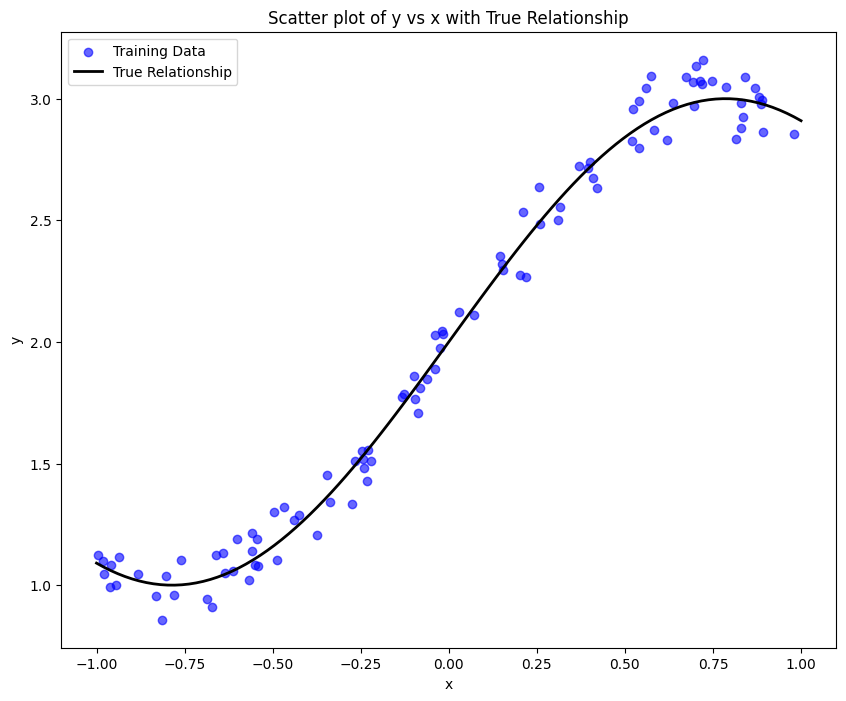

In [29]:
# YOUR CODE HERE
plt.figure(figsize=(10, 8)) 
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)

x_line = np.linspace(-1, 1, 100)
y_line = np.sin(2 * x_line) + 2 
plt.plot(x_line, y_line, color='black', linestyle= 'solid', label='True Relationship', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y vs x with True Relationship')

plt.legend()
plt.show()

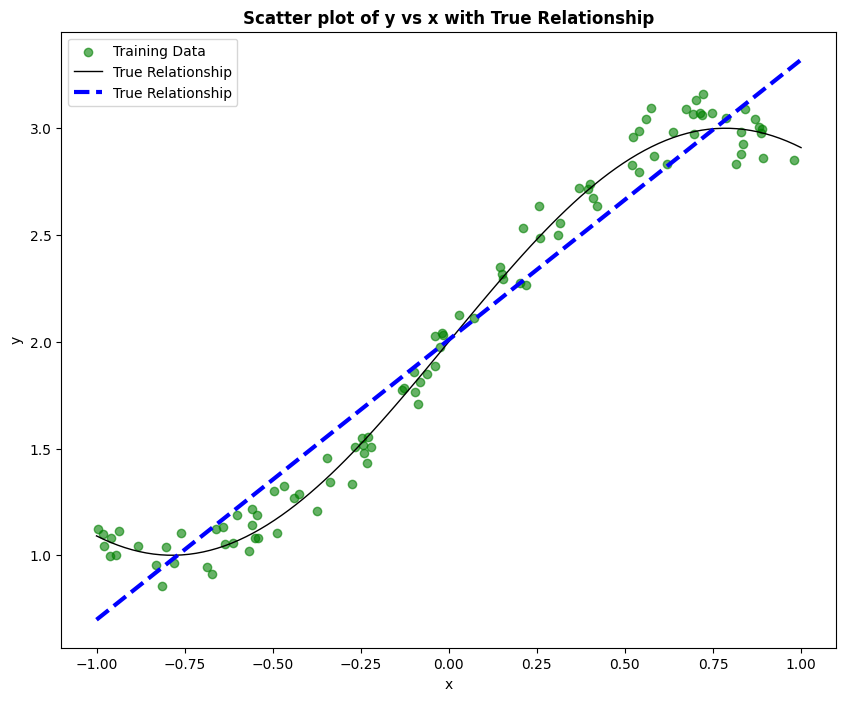

Mean Squared Error (MSE): 1.6594
lr.coef_: [1.31146977]
lr.intercept_: 2.009525993376508
Training set score: 0.95
Test set score: -0.54


In [30]:
# Train a linear regression model on the training data
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train)

# Get the predicted values for the line
y_pred_test = lr.predict(X_test.reshape(-1, 1))


#plot the graph
plt.figure(figsize=(10, 8)) 
plt.scatter(X_train, y_train, color='green', label='Training Data', alpha=0.6)
x_line = np.linspace(-1, 1, 100)
y_line = np.sin(2 * x_line) + 2 
plt.plot(x_line, y_line, color='black', linestyle= 'solid', label='True Relationship', linewidth=1)

# Get the predicted values for the line
y_pred = lr.predict(x_line.reshape(-1, 1))
#plot the predicted line
plt.plot(x_line, y_pred, color='blue', linestyle= 'dashed', label='True Relationship', linewidth=3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y vs x with True Relationship', weight='bold')

plt.legend()
plt.show()


mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1))))
print("Test set score: {:.2f}".format(lr.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))))


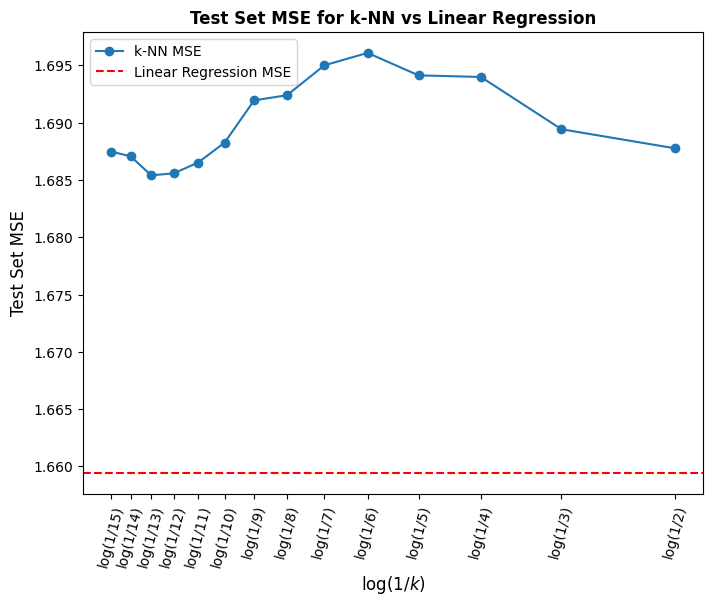

In [31]:
# Assuming X_train, y_train, X_test, and y_test have already been defined

# Recompute k-NN MSE for test set and plot
knn_mse = []
k_values = np.arange(2, 16)

# Calculate the MSE for each k in k_values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train.reshape(-1, 1), y_train)
    y_pred_knn = knn.predict(X_test.reshape(-1, 1))
    mse = mean_squared_error(y_test, y_pred_knn)
    knn_mse.append(mse)

# Train linear regression and compute test set MSE
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train)
y_pred_linear = lr.predict(X_test.reshape(-1, 1))
linear_mse = mean_squared_error(y_test, y_pred_linear)

# Plot MSE against log(1/k) positions
plt.figure(figsize=(8, 6))

# Plot the data at actual log(1/k) positions
log_1_over_k = np.log(1 / np.array(k_values))
plt.plot(log_1_over_k, knn_mse, marker='o', label='k-NN MSE')

# Add horizontal line for linear regression MSE
plt.axhline(y=linear_mse, color='r', linestyle='--', label='Linear Regression MSE')

# Use the actual log(1/k) values for both the data and ticks
xticks_values = np.log(1 / np.array(k_values))
xticks_labels = [f'log(1/{k})' for k in k_values]

# Apply the correct ticks to match the data points
plt.xticks(ticks=xticks_values, labels=xticks_labels, rotation=75)

# Labels and title
plt.xlabel('$\log(1/k)$', fontsize=12)
plt.ylabel('Test Set MSE', fontsize=12)
plt.title('Test Set MSE for k-NN vs Linear Regression', weight='bold')
plt.legend()

plt.show()



**Your Findings**

Your Thoughts Here

### Q1.7: Nonlinear Case With Multiple Predictors (8 Points)

You might suspect, from your previous results, that in the real world when none of the relationships could be linear, it would always pay off to use k-NN over linear regression. Examine this hypothesis in a situation with more than one variable. Stay with the same true relationship from the model in step 6, but add additional noise variables that are not predictors of $y$. In particular, consider the model:

   $$
   y_i = \sin(2x_{i1}) + 2 + 0*x_{i2} + \cdots + 0*x_{ip} + \epsilon_i
   $$

   where $p = 2, 5, 10, 20$. The additional noisy variables $x_{i2}, \dots, x_{ip}$ are drawn from a uniform distribution on $[-1, 1]$. Create a plot for every $p$ taking values in $1, \dots, 20$. Each plot should have the test set MSE against model complexity $ \log(1/k) $ and a dashed horizontal line showing the test set MSE for the best linear fit. Briefly explain the result of the simulation.


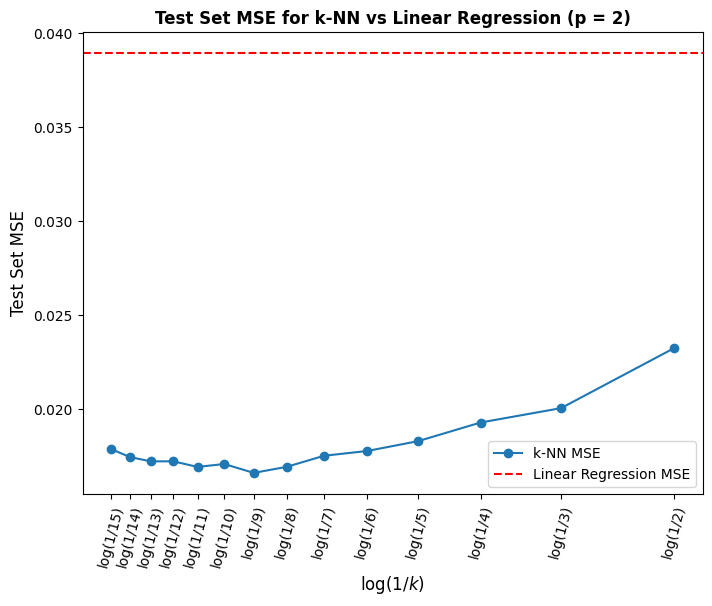

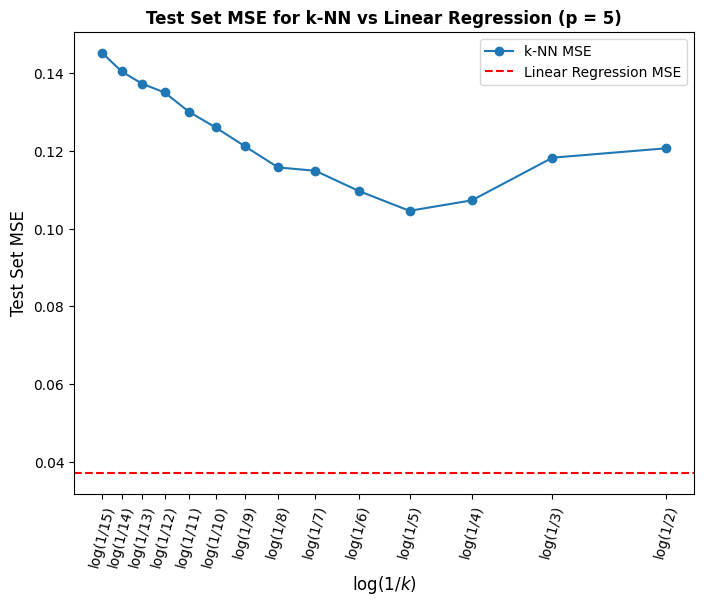

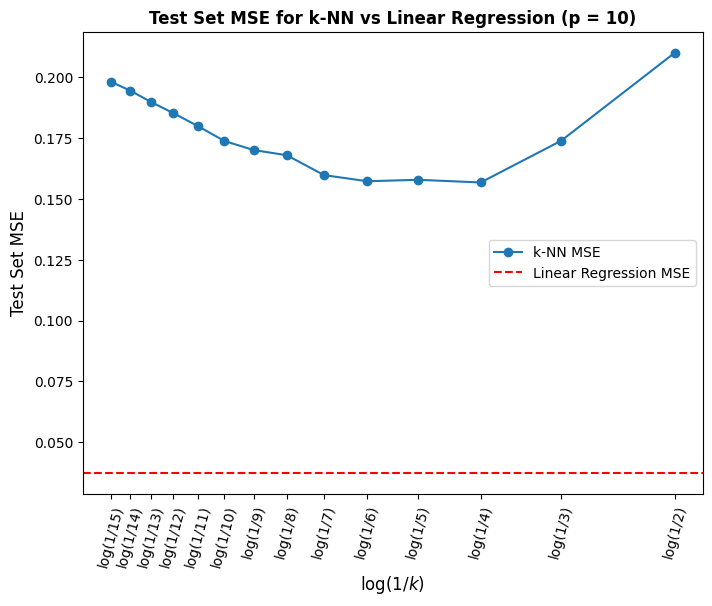

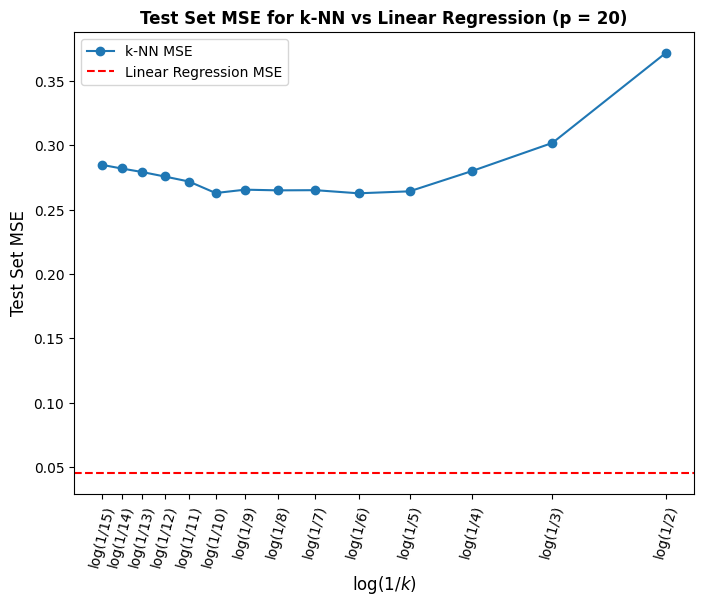

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function to simulate k-NN vs linear regression for given p
def simulate_knn_vs_linear(p, k_values=np.arange(2, 16)):
    np.random.seed(42)
    
    # Generate training and test data
    n_train, n_test = 100, 1000
    X_train = np.random.uniform(-1, 1, (n_train, p))  # p features
    X_test = np.random.uniform(-1, 1, (n_test, p))    # Test set
    
    # Generate y based on only x1, rest are noise
    y_train = np.sin(2 * X_train[:, 0]) + 2 + np.random.normal(0, 0.1, n_train)
    y_test = np.sin(2 * X_test[:, 0]) + 2 + np.random.normal(0, 0.1, n_test)
    
    # Store MSEs for k-NN
    knn_mse = []
    
    # Train k-NN for different k values and compute test set MSE
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred_knn)
        knn_mse.append(mse)
    
    # Train linear regression and compute test set MSE
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_linear = lr.predict(X_test)
    linear_mse = mean_squared_error(y_test, y_pred_linear)
    
    # Plot MSE for k-NN against log(1/k)
    plt.figure(figsize=(8, 6))
    log_1_over_k = np.log(1 / np.array(k_values))
    plt.plot(log_1_over_k, knn_mse, marker='o', label='k-NN MSE')
    
    # Add horizontal line for linear regression MSE
    plt.axhline(y=linear_mse, color='r', linestyle='--', label='Linear Regression MSE')
    
    # Set xticks and labels
    xticks_values = np.log(1 / np.array(k_values))
    xticks_labels = [f'log(1/{k})' for k in k_values]
    plt.xticks(ticks=xticks_values, labels=xticks_labels, rotation=75)
    
    # Labels and title
    plt.xlabel('$\log(1/k)$', fontsize=12)
    plt.ylabel('Test Set MSE', fontsize=12)
    plt.title(f'Test Set MSE for k-NN vs Linear Regression (p = {p})', weight='bold')
    plt.legend()
    plt.show()

# Simulate for p = 2, 5, 10, 20
for p in [2, 5, 10, 20]:
    simulate_knn_vs_linear(p)


**Your Findings**

Your Thoughts Here

## Part II. Delve into regression models with real-world data (30 Points)

In this question, you will explore prices of used cars as a function of different input variables. 

Download the file UsedCars.csv from Blackboard (教学网).

In [33]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier




import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('UsedCars.csv')
df.head(5)

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2988,320,f,193296.0,1995,Black,3.2,Gasoline,SoA,unsp,Alloy
1,6595,320,f,129948.0,1995,other,3.2,Gasoline,Mid,Premium,Alloy
2,7993,320,f,140428.0,1997,White,3.2,Gasoline,Mid,Bose,Alloy
3,5995,420,f,113622.0,1999,Silver,4.2,Gasoline,Mid,unsp,Alloy
4,3000,420,f,167673.0,1999,Silver,4.2,Gasoline,SoA,unsp,Alloy


### Q2.1: Explore the correlation plots among variables (4 Points)

Plot the heatmap of the correlation matrix and the pairplot for numeric columns in the dataset.

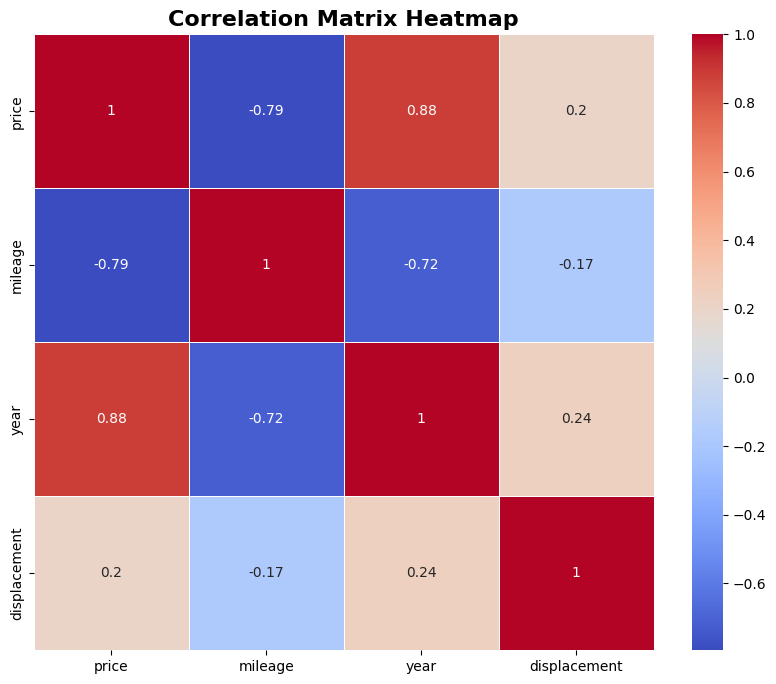

<Figure size 1000x800 with 0 Axes>

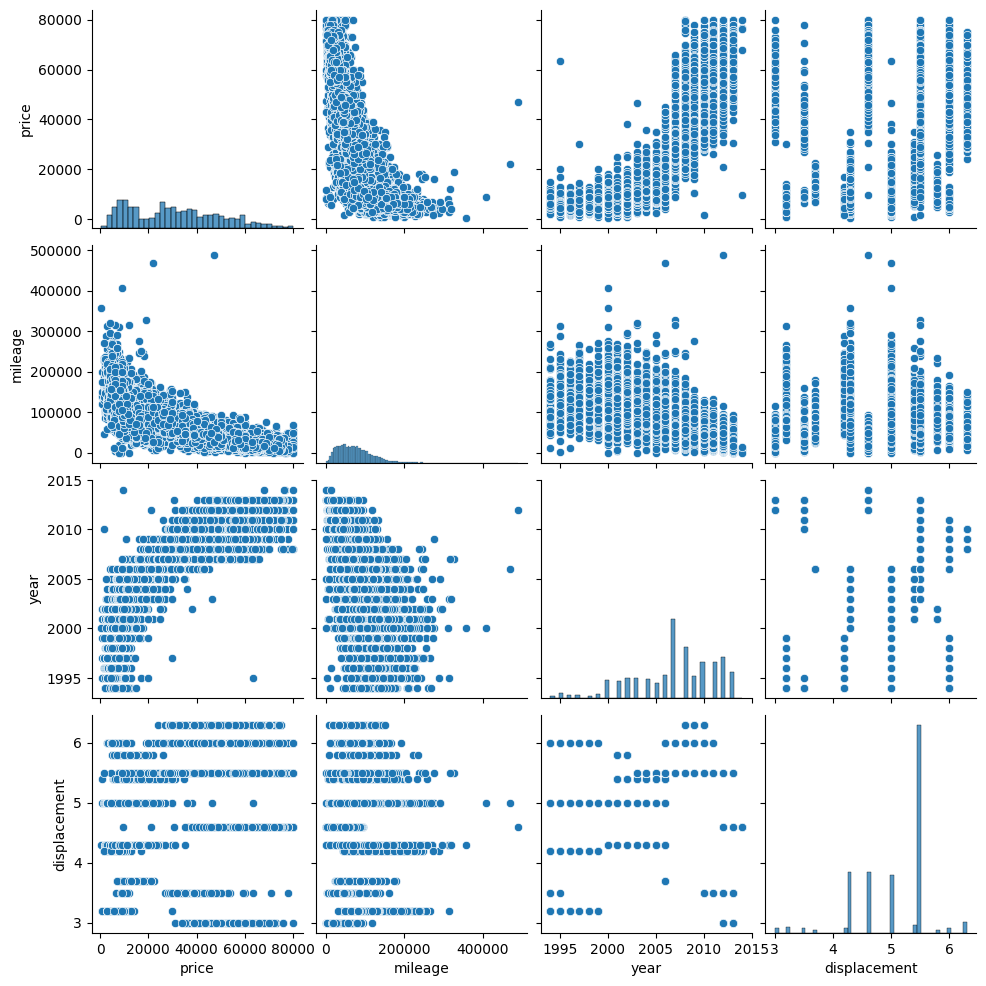

In [35]:
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16, weight='bold')


# Pairplot of the numeric columns
plt.figure(figsize=(10, 8))
sns.pairplot(numeric_df)
plt.show()


### Q2.2 Train and compare regression models (18 Points)

- Compare among regular linear regression models, polynomial, Ridege, and Lasso regression models. 
- Note that for each model, you have to search for the best model parameters.
- Comparison requirement: consider both the model performance and time efficiency.

In [50]:
#visualize categorical values
print(df.trim.unique())
print(df.isOneOwner.unique())
print(df.color.unique())
print(df.fuel.unique())
print(df.region.unique())
print(df.soundSystem.unique())
print(df.wheelType.unique())

#Encoding for categorical values
df['isOneOwner'] = df['isOneOwner'].map({'t': 1, 'f': 0})
df = pd.get_dummies(df, columns=['trim', 'color', 'fuel', 'region', 'soundSystem', 'wheelType'], drop_first=True)

df = df.astype(float)
print(df.dtypes.tolist())


AttributeError: 'DataFrame' object has no attribute 'trim'

In [37]:
X = df.drop('price', axis=1)  # Features (all columns except 'price')
y = df['price']               # Target variable (price)

In [38]:
# Applying Z-score normalization using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train



array([[-0.45722146, -0.04607089,  0.23981769, ..., -0.14764081,
        -0.07757028,  1.17784361],
       [-0.45722146,  0.99563682, -0.00242691, ..., -0.14764081,
        -0.07757028, -0.84900915],
       [-0.45722146, -1.10481885,  0.9665515 , ..., -0.14764081,
        -0.07757028, -0.84900915],
       ...,
       [-0.45722146,  0.33020774,  0.23981769, ..., -0.14764081,
        -0.07757028, -0.84900915],
       [-0.45722146, -0.73471557,  0.48206229, ..., -0.14764081,
        -0.07757028,  1.17784361],
       [-0.45722146, -0.41691707,  0.7243069 , ..., -0.14764081,
        -0.07757028,  1.17784361]])

In [39]:
# 1. Linear Regression (4 points)
import time

# YOUR CODE HERE
lr = LinearRegression()
    
start_time = time.time()
lr.fit(X_train, y_train)
lr_time = time.time() - start_time

y_lr_train_predict = lr.predict(X_train)
y_lr_predict = lr.predict(X_test)

lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)


print('-----Score-----')
print('train score: ', lr_train_score)
print('test score: ', lr_test_score)
print('\n')

print('-----MSE-----')
print('Training set MSE score', mse(y_lr_train_predict,y_train))
print('Test set MSE score',mse(y_lr_predict,y_test) )
print('\n')

print('-----MAE-----')
print('Training set MAE score',mae(y_lr_train_predict,y_train))
print('Test set MAE score', mae(y_lr_predict,y_test))
print('\n')

print(f"Training time: {lr_time:.4f} seconds")

-----Score-----
train score:  0.8996720952005086
test score:  0.9000450327901596


-----MSE-----
Training set MSE score 33764171.2958299
Test set MSE score 32632807.828710318


-----MAE-----
Training set MAE score 4305.396612594598
Test set MAE score 4276.436279912023


Training time: 0.0086 seconds


# 2. Polynomial Regression (4 points)

# YOUR CODE HERE
poly = PolynomialFeatures()

param_poly = {'polynomialfeatures__degree': range(1, 4)}
pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly, cv=5, n_jobs=2, return_train_score=True)

grid_poly.fit(X_train, y_train)

best_model = grid_poly.best_estimator_

y_poly_train_predict = best_model.predict(X_train)
y_poly_predict = best_model.predict(X_test)

best_model_train_score = best_model.score(X_train, y_train)
best_model_test_score = best_model.score(X_test, y_test)

start_time = time.time()
best_model.fit(X_train, y_train)
best_poly_time = time.time() - start_time

print('-----Best Parameters and CV-----')
print('Best parameters: ', grid_poly.best_params_)
print('Best cross-validation score:', grid_poly.best_score_)
print('\n')

print('-----Score-----')
print('train score (Best Model): ', best_model_train_score)
print('test score (Best Model): ', best_model_test_score)
print('\n')

print('-----MSE-----')
print('Training set MSE score:', mse(y_poly_train_predict, y_train))
print('Test set MSE score:', mse(y_poly_predict, y_test))
print('\n')

print('-----MAE-----')
print('Training set MAE score:', mae(y_poly_train_predict, y_train))
print('Test set MAE score:', mae(y_poly_predict, y_test))
print('\n')

print(f"Training time (Best Model): {best_poly_time:.4f} seconds")


In [40]:
# 3. Ridge Regression (5 points)

# YOUR CODE HERE
ridge = Ridge()

param_ridge = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200, 500, 1000, 2000, 5000, 10000]}
grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, n_jobs=2, return_train_score=True)

grid_ridge.fit(X_train, y_train)

best_ridge_model = grid_ridge.best_estimator_

y_ridge_train_predict = best_ridge_model.predict(X_train)
y_ridge_predict = best_ridge_model.predict(X_test)

best_ridge_train_score = best_ridge_model.score(X_train, y_train)
best_ridge_test_score = best_ridge_model.score(X_test, y_test)

start_time = time.time()
best_ridge_model.fit(X_train, y_train)
best_ridge_time = time.time() - start_time

print('-----Best Parameters and CV-----')
print('Best parameters: ', grid_ridge.best_params_)
print('Best cross-validation score:', grid_ridge.best_score_)
print('\n')

print('-----Score-----')
print('train score (Best Model): ', best_ridge_train_score)
print('test score (Best Model): ', best_ridge_test_score)
print('\n')

print('-----MSE-----')
print('Training set MSE score:', mse(y_ridge_train_predict, y_train))
print('Test set MSE score:', mse(y_ridge_predict, y_test))
print('\n')

print('-----MAE-----')
print('Training set MAE score:', mae(y_ridge_train_predict, y_train))
print('Test set MAE score:', mae(y_ridge_predict, y_test))
print('\n')

print(f"Training time (Best Model): {best_ridge_time:.4f} seconds")


-----Best Parameters and CV-----
Best parameters:  {'alpha': 0.1}
Best cross-validation score: 0.8989855945141401


-----Score-----
train score (Best Model):  0.8996723166497372
test score (Best Model):  0.9000389772824539


-----MSE-----
Training set MSE score: 33764096.769707724
Test set MSE score: 32634784.80118886


-----MAE-----
Training set MAE score: 4305.464942556139
Test set MAE score: 4276.625892783611


Training time (Best Model): 0.0080 seconds


In [41]:
# 4. Lasso Regression (5 points)

# YOUR CODE HERE
lasso = Lasso()

param_lasso = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200, 500, 1000, 2000, 5000, 10000] }
grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, n_jobs=2, return_train_score=True)

grid_lasso.fit(X_train, y_train)

best_lasso_model = grid_lasso.best_estimator_

y_lasso_train_predict = best_lasso_model.predict(X_train)
y_lasso_predict = best_lasso_model.predict(X_test)

best_lasso_train_score = best_lasso_model.score(X_train, y_train)
best_lasso_test_score = best_lasso_model.score(X_test, y_test)

start_time = time.time()
best_lasso_model.fit(X_train, y_train)
best_lasso_time = time.time() - start_time

print('-----Best Parameters and CV-----')
print('Best parameters: ', grid_lasso.best_params_)
print('Best cross-validation score:', grid_lasso.best_score_)
print('\n')

print('-----Score-----')
print('train score (Best Model): ', best_lasso_train_score)
print('test score (Best Model): ', best_lasso_test_score)
print('\n')

print('-----MSE-----')
print('Training set MSE score:', mse(y_lasso_train_predict, y_train))
print('Test set MSE score:', mse(y_lasso_predict, y_test))
print('\n')

print('-----MAE-----')
print('Training set MAE score:', mae(y_lasso_train_predict, y_train))
print('Test set MAE score:', mae(y_lasso_predict, y_test))
print('\n')

print(f"Training time (Best Model): {best_lasso_time:.4f} seconds")


/home/jingjie/anaconda3/envs/mlai/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+11, tolerance: 4.325e+08
  model = cd_fast.enet_coordinate_descent(
/home/jingjie/anaconda3/envs/mlai/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+11, tolerance: 4.301e+08
  model = cd_fast.enet_coordinate_descent(
/home/jingjie/anaconda3/envs/mlai/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

-----Best Parameters and CV-----
Best parameters:  {'alpha': 0.1}
Best cross-validation score: 0.8989857275653023


-----Score-----
train score (Best Model):  0.8996722867804099
test score (Best Model):  0.9000383952432486


-----MSE-----
Training set MSE score: 33764106.821877055
Test set MSE score: 32634974.8224961


-----MAE-----
Training set MAE score: 4305.522424248277
Test set MAE score: 4276.664193887339


Training time (Best Model): 0.4104 seconds


### Q2.3 Variable selection (5 Points)

LASSO can be used as a tool of variable selection. Please use LASSO (or other variable selection approaches, see https://scikit-learn.org/stable/modules/feature_selection.html) to select valuable features. Use the selected features to replicate Q2.2. Will the feature selection benefit (from the perspectives of performance or efficiency)?

In [42]:

# Initialize Lasso model with a specific alpha value for regularization
lasso = Lasso(alpha=0.1)

# Fit the Lasso model to the training data
lasso.fit(X_train, y_train)

# Retrieve the coefficients of the features
lasso_coefficients = lasso.coef_

# Get the indices of the selected features (those with non-zero coefficients)
selected_features = np.where(lasso_coefficients != 0)[0]

# Output the selected features and the corresponding coefficients
print("Selected features (non-zero coefficients):", selected_features)
print("Coefficients of selected features:", lasso_coefficients[selected_features])

# Make predictions using the fitted Lasso model
y_lasso_train_predict = lasso.predict(X_train)
y_lasso_predict = lasso.predict(X_test)

# Calculate the training and test scores
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

# Display train and test scores
print('-----Score-----')
print('train score: ', lasso_train_score)
print('test score: ', lasso_test_score)
print('\n')

# Calculate and display MSE and MAE for both train and test sets
print('-----MSE-----')
print('Training set MSE score:', mse(y_lasso_train_predict, y_train))
print('Test set MSE score:', mse(y_lasso_predict, y_test))
print('\n')

print('-----MAE-----')
print('Training set MAE score:', mae(y_lasso_train_predict, y_train))
print('Test set MAE score:', mae(y_lasso_predict, y_test))
print('\n')

# Time the fitting process for the Lasso model
start_time = time.time()
lasso.fit(X_train, y_train)
lasso_time = time.time() - start_time

# Display the time taken to fit the Lasso model
print(f"Training time (Lasso Model): {lasso_time:.4f} seconds")



Selected features (non-zero coefficients): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
Coefficients of selected features: [  319.74444769 -4922.75746565  8635.23239813 -7270.41016024
 -1287.83933072 -1917.65651316  1236.84636494   893.50315976
  4155.76790935  2356.31138884 11307.9053639   4180.90899805
  7619.35682768  4371.46921393  -254.30297006  -392.47630938
  -232.06604851   574.98450682   -93.48601031    42.21026558
 -1754.84755238   494.58155573   247.99630782   -26.94718804
    32.46849196    43.07386539   326.47099215    69.35593861
   129.16913475   165.51907539 -1782.88152101 -2656.86900374
 -2875.1599456  -3001.62970483    39.35626494  -102.43431315
    58.25841157]
-----Score-----
train score:  0.8996722867804099
test score:  0.9000383952432486


-----MSE-----
Training set MSE score: 33764106.821877055
Test set MSE score: 32634974.8224961


-----MAE-----
Training set MAE score: 4305.522424248277
Test se

### Q2.4 Your conclusion (3 Points)

Which one is the best? Why? Does variable selection help?


## Part III. Play with different classification models with a simple dataset (25 Points)

### Data Introduction

The data consists of two interleaving half circles, resembling a crescent moon shape, which is why it is called "moons." And It is often used for classification tasks because the two classes in the dataset are not linearly separable.

Please refer to the following link for more detailed information.
https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_moons.html


In [43]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

selectN = 10000

(X, y) = make_moons(n_samples=selectN, noise=0.4)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Q3 Classification

Step 1
- write a function (input argument is selectN) to compare different classification models 
- Alternative models: logistic regression, KNN, and Decision Trees
- The function should also include the model parameter selecting process
- Note: you have to consider both the model performance and time efficiency


Step 2
- given different selectN, report how the sample sizes affect the model comparison results
- Visualize your comparison results


In [44]:
# Train a logistic regression model, report the coefficients and model performance (6 points)



In [45]:
# Train a KNN model, report the coefficients, the best parameters, and model performance (8 points)
# hint: find the optimal k

# YOUR CODE HERE



In [49]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (8 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
opt_tree = DecisionTreeClassifier(random_state = 0, criterion="entropy")
param_DT = {
            "max_depth": range(1,20),
            "min_samples_split": range(2,10,1),
            "max_leaf_nodes": range(2,5)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.score(X_test,y_test))


{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8448


### Summarize your findings (3 Points)

Which one is the best?